In [1]:
import h5py as hp
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import illustris_python as il
import matplotlib.gridspec as gspec
import matplotlib as mpl
import copy
from hc_lib.plots.fig_lib import FigureLibrary
tngpath = '/lustre/cosinga/L75n1820TNG/'
basepath = '/lustre/cosinga/hcolor/fig_md_analysis/'

In [2]:
def get_match(props):
    keys = pkfile.keys()
    matches = []
    for k in keys:
        is_match = True
        if 'x' in k:
            for p,v in props.items():
                try:
                    lval = pkfile[k].attrs[p]
                    
                    is_match = (is_match and v in lval)
                except KeyError:
                    continue
            if is_match:
                matches.append(k)
    return matches

In [3]:
pkfile = hp.File(basepath+'all_auto/HIautopk.hdf5', 'r')
head = il.groupcat.loadHeader(tngpath+'output/', 99)


In [4]:
print(pkfile.keys())
print(dict(pkfile['0 0 0 x'].attrs).keys())


<KeysViewHDF5 ['0 0 0 x', '0 0 0 y', '0 0 1 x', '0 0 1 y', '0 0 10 x', '0 0 10 y', '0 0 11 x', '0 0 11 y', '0 0 12 x', '0 0 12 y', '0 0 13 x', '0 0 13 y', '0 0 2 x', '0 0 2 y', '0 0 3 x', '0 0 3 y', '0 0 4 x', '0 0 4 y', '0 0 5 x', '0 0 5 y', '0 0 6 x', '0 0 6 y', '0 0 7 x', '0 0 7 y', '0 0 8 x', '0 0 8 y', '0 0 9 x', '0 0 9 y', '0 1 0 x', '0 1 0 y', '0 1 1 x', '0 1 1 y', '0 1 10 x', '0 1 10 y', '0 1 11 x', '0 1 11 y', '0 1 12 x', '0 1 12 y', '0 1 13 x', '0 1 13 y', '0 1 2 x', '0 1 2 y', '0 1 3 x', '0 1 3 y', '0 1 4 x', '0 1 4 y', '0 1 5 x', '0 1 5 y', '0 1 6 x', '0 1 6 y', '0 1 7 x', '0 1 7 y', '0 1 8 x', '0 1 8 y', '0 1 9 x', '0 1 9 y']>
dict_keys(['fieldname', 'redshift', 'snapshot', 'space'])


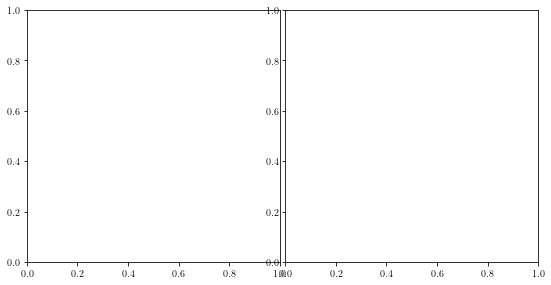

In [25]:
nrows = 1
ncols = 2
xborder = 1
yborder = 1
panel_bt = 0.1
panel_length = 3.5

# border input can be either a list or single number
if isinstance(xborder, float) or isinstance(xborder, int):
    xborder = [xborder, xborder]
if isinstance(yborder, float) or isinstance(yborder, int):
    yborder = [yborder, yborder]
if isinstance(panel_bt, float) or isinstance(panel_bt, int):
    panel_bt = [panel_bt, panel_bt]
# creating Figure object

figwidth = panel_length * ncols + panel_bt[0] * (ncols - 1) + \
        xborder[0] + xborder[1]
figheight = panel_length * nrows + panel_bt[1] * (nrows - 1) + \
        yborder[0] + yborder[1]

fig = plt.figure(figsize=(figwidth, figheight))

# creating gridspec
gs = gspec.GridSpec(nrows, ncols, left= xborder[0]/figwidth, right=1-xborder[1]/figwidth,
        top=1-yborder[1]/figheight, bottom=yborder[0]/figheight,
        wspace=panel_bt[0]*ncols/figwidth, hspace=panel_bt[1]*nrows/figheight)

# making panels list
panels = []
for i in range(nrows):
    col_panels = []
    for j in range(ncols):
        col_panels.append(fig.add_subplot(gs[i, j]))

    panels.append(col_panels)

flib = FigureLibrary(fig=fig, panels=panels)
flib.panel_length = panel_length
flib.panel_bt = panel_bt
flib.xborder = xborder
flib.yborder = yborder
flib.has_cbar_col = False
flib.figsize = [figwidth, figheight]

In [26]:
keys_for_panels = np.empty((nrows,ncols), dtype=object)

spaces = ['real', 'redshift']
for i in range(nrows):
    for j in range(ncols):
        props = {'space':spaces[j]}
        keys_for_panels[i,j] = get_match(props)

In [27]:
len(keys_for_panels[0,0])

14

In [28]:
for i in range(nrows):
    for j in range(ncols):
        
        idx = (i,j)
        keys = keys_for_panels[idx]
        
        # plot hiptl
        plot_pk = []
        for k in keys:
            wavenum = pkfile[k]
            pk_key = k[:-1] + 'y'
            pk = pkfile[pk_key]
            if 'hiptl' in wavenum.attrs['fieldname']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        print(plot_pk.shape)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'HI Galaxy Particles', color='green')
        
        # plot hisubhalo
        plot_pk = []
        for k in keys:
            wavenum = pkfile[k]
            pk_key = k[:-1] + 'y'
            pk = pkfile[pk_key]
            if 'hisubhalo' in wavenum.attrs['fieldname']:
                plot_wn = wavenum[:]
                plot_pk.append(pk[:])
        plot_pk = np.array(plot_pk)
        print(plot_pk.shape)
        flib.plotFillPanel(idx, plot_wn, plot_pk, label = 'HI Galaxies', color='orange')
        
        
        # plot vn
        for k in keys:
            wavenum = pkfile[k]
            pk_key = k[:-1] + 'y'
            pk = pkfile[pk_key]
            if 'vn' in wavenum.attrs['fieldname']:
                plot_wn = wavenum[:]
                flib.plotLinePanel(idx, plot_wn, pk, 'HI Particles', color = 'purple')
        

(4, 692)
(9, 692)
(4, 692)
(9, 692)


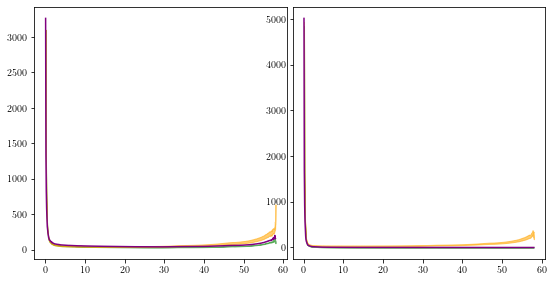

In [29]:
fig

In [30]:
box = head['BoxSize'] /1e3 * head['Time']
mink = wavenum[0]
# axis
flib.logAxis()
flib.xLimAdjustToNyquist(gridres=800, box = box, xleft = mink)
flib.flushYAxisToData()
flib.matchAxisLimits()

# ticks
flib.changeTickDirection()
flib.removeDefaultTickLabels()

# labels
flib.addLegend()
flib.defaultAxesLabels()
flib.addColLabels(['Real-Space', 'Redshift-Space'], in_panel=True)


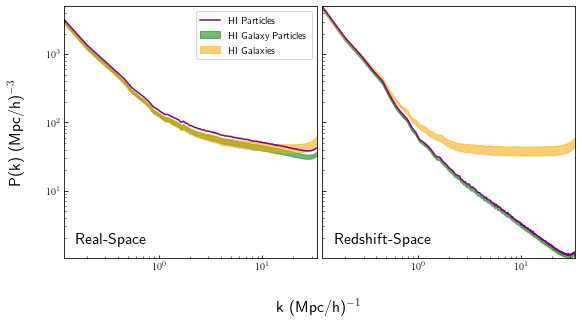

In [31]:
fig

In [32]:
fig.savefig("HI_auto_methodology_new_colors.pdf")